In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("../data/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset (1).csv")


# Proyecto de Análisis de Salud

En este notebook se realiza el análisis exploratorio del conjunto de datos
**“Lifestyle and Health Risk Prediction”**, con el objetivo de estudiar cómo
los hábitos de vida se relacionan con distintos indicadores de salud y niveles
de riesgo.


## 1. Carga e inspección inicial de los datos

En esta sección se realiza la carga del conjunto de datos y una primera
inspección para conocer su tamaño, los tipos de variables y demas datos que se necesiten



### 1.1 Primeras filas del dataset

In [3]:
df = pd.read_csv("../data/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset (1).csv")

df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


### 1.2 Tamaño del conjunto de datos

In [4]:
df.shape

(5000, 12)

La base de datos tiene un total de 5000 filas y 12 variables

### 1.3 Tipo de variables de la base de datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


### 1.4 Descripción estadistica de varibles numéricas

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,5000.0,48.80560,17.906991,18.0,34.0,49.0,64.0,79.0
weight,5000.0,77.35920,18.714567,45.0,61.0,77.0,94.0,109.0
height,5000.0,171.93320,15.822225,145.0,158.0,171.5,186.0,199.0
sleep,5000.0,6.99706,1.432849,3.0,6.0,7.0,8.0,10.0
bmi,5000.0,26.84388,8.252490,11.4,20.3,26.0,32.4,51.4


In [7]:
df.select_dtypes(include="object").describe().T


,count,unique,top,freq
exercise,5000,4,medium,1985
sugar_intake,5000,3,medium,2511
smoking,5000,2,no,4023
alcohol,5000,2,no,3741
married,5000,2,yes,3018
profession,5000,8,student,644
health_risk,5000,2,high,3490


A partir de estas salidas se observa el tamaño total de la base de datos,
los tipos de variables (numéricas y categóricas) y el rango general de los
valores. Esto sirve como punto de partida para el análisis posterior.


## 2. Manejo de datos faltantes

Aquí se identifican los valores faltantes presentes en el dataset y se analiza
su distribución mediante tablas y un mapa de calor. Con base en esto se decide
si es necesario eliminar registros o imputar valores.


### 2.1 Conteo y porcentaje valores faltantes por columna

In [8]:
# Conteo
df.isnull().sum()

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64

In [9]:
# Porcentaje
(df.isnull().sum() / len(df)) * 100

age             0.0
weight          0.0
height          0.0
exercise        0.0
sleep           0.0
sugar_intake    0.0
smoking         0.0
alcohol         0.0
married         0.0
profession      0.0
bmi             0.0
health_risk     0.0
dtype: float64

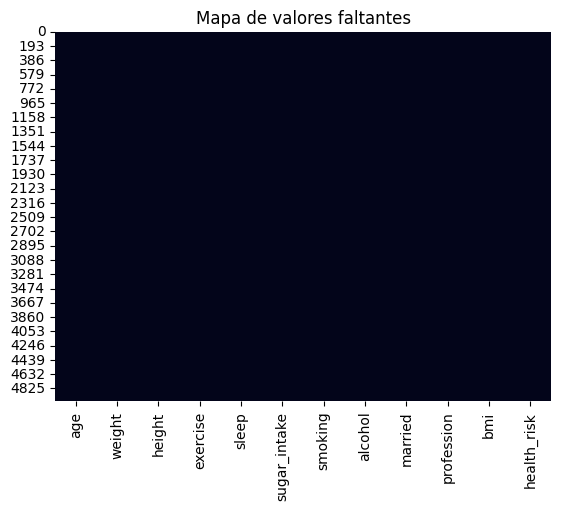

In [10]:
# Mapa de Calor
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()


En la tabla y el mapa de calor se observa que la base de datos presenta un
porcentaje ninguno en sus variables.
Dado que la ausencia de datos no es significativa, se decide continuar el
análisis sin aplicar técnicas de imputación y manteniendo el conjunto de
datos completo.


## 3. Identificación de outliers



### 3.1 Seleccion de variables numéricas relevantes

In [11]:
vn = ["age", "weight", "height", "sleep", "bmi"]
df[vn].head()


,age,weight,height,sleep,bmi
0,56,67,195,6.1,17.6
1,69,76,170,6.9,26.3
2,46,106,153,6.6,45.3
3,32,54,186,8.5,15.6
4,60,98,195,8.0,25.8


### 3.2 Boxplots por variable numérica

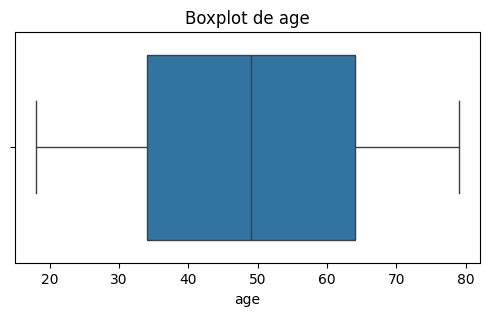

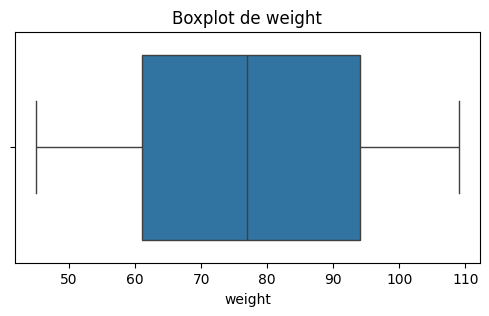

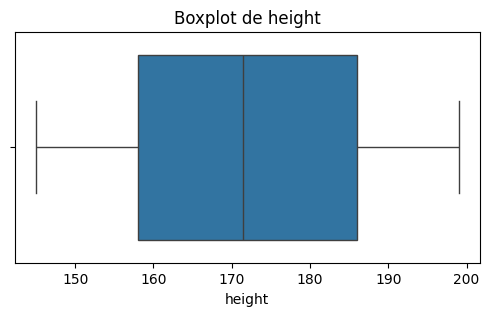

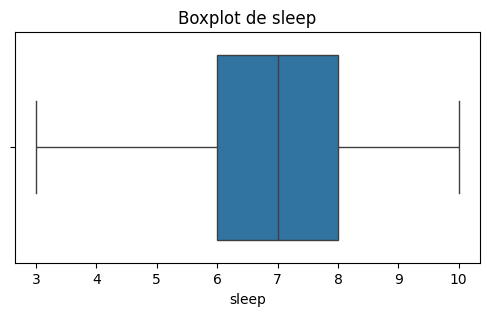

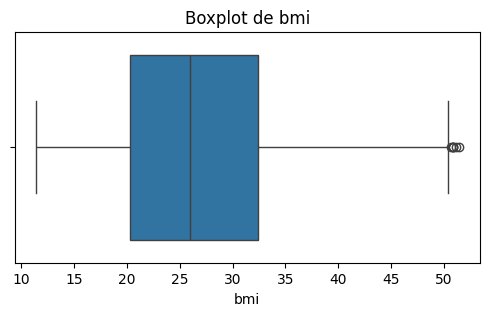

In [12]:
for col in vn:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()


In [13]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

li = Q1 - 1.5 * IQR
ls = Q3 + 1.5 * IQR

outliers_bmi = df[(df["bmi"] < li) | (df["bmi"] > ls)]
outliers_bmi.head()


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
544,40,107,145,high,7.3,high,no,no,no,office_worker,50.9,high
2814,64,107,145,low,8.2,medium,no,no,no,engineer,50.9,high
3153,30,109,146,medium,6.5,medium,no,no,yes,student,51.1,low
3964,78,107,145,medium,7.6,medium,no,yes,yes,doctor,50.9,high
4708,40,108,145,low,7.5,high,no,no,yes,doctor,51.4,high


A partir de los boxplots se observan posibles valores atípicos en algunas
variables numéricas, especialmente en el índice de masa corporal (BMI) y en la
edad. Estos casos extremos pueden corresponder a individuos con condiciones de
salud particulares y se tendrán en cuenta al interpretar las estadísticas y las
agrupaciones posteriores.


## 4 .Tratamiento de duplicados e inconsistencias de texto

In [14]:
print("CANTIDAD DE FILAS DUPLICADAS:")
print(df.duplicated().sum())

CANTIDAD DE FILAS DUPLICADAS:
0


In [15]:
print(" REVISIÓN DE VALORES ÚNICOS \n")

columnas_texto = ["smoking", "alcohol", "married", "profession", "health_risk"]

for col in columnas_texto:
    print(f"Valores únicos en {col}:")
    print(df[col].unique())
    print("\n")
print("no hay inconsistencias de texto ")    

 REVISIÓN DE VALORES ÚNICOS 

Valores únicos en smoking:
['yes' 'no']


Valores únicos en alcohol:
['yes' 'no']


Valores únicos en married:
['yes' 'no']


Valores únicos en profession:
['office_worker' 'teacher' 'artist' 'farmer' 'driver' 'engineer' 'student'
 'doctor']


Valores únicos en health_risk:
['high' 'low']


no hay inconsistencias de texto 


## 5. Nuevas variables

In [16]:
#  VARIABLE NUEVA 1: CATEGORÍA DE BMI 
def clasificar_bmi(valor):
    if valor < 18.5:
        return "underweight"
    elif valor < 25:
        return "normal"
    elif valor < 30:
        return "overweight"
    else:
        return "obese"

df["bmi_category"] = df["bmi"].apply(clasificar_bmi)


#  VARIABLE NUEVA 2: CALIDAD DE SUEÑO 
def calidad_sueno(horas):
    if horas < 6:
        return "bad"
    elif horas <= 8:
        return "regular"
    else:
        return "good"

df["sleep_quality"] = df["sleep"].apply(calidad_sueno)



In [17]:
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,sleep_quality
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high,underweight,regular
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high,overweight,regular
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high,obese,regular
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low,underweight,good
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high,overweight,regular
